<a href="https://colab.research.google.com/github/fatemafaria142/Name-Entity-Recognition/blob/main/Name_Entity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **bold text** **BERT model** expects a sequence of tokens (words) as an input. In each sequence of tokens, there are two special tokens that BERT would expect as an input:

- [CLS]: This is the first token of every sequence, which stands for classification token.
- [SEP]: This is the token that makes BERT know which token belongs to which sequence. This special token is mainly important for a next sentence prediction task or question-answering task. If we only have one sequence, then this token will be appended to the end of the sequence.

* It is also important to note that the maximum size of tokens that can be fed into BERT model is 512. If the tokens in a sequence are less than 512, we can use padding to fill the unused token slots with [PAD] token. If the tokens in a sequence are longer than 512, then we need to do a truncation.

In [ ]:
!pip install transformers datasets tokenizers seqeval -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.8 MB/s eta 0:00:00


In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 6.2 MB/s eta 0:00:00


In [ ]:
!pip install transformers[torch]

### **Token classification**

**Named entity recognition (NER):** Find the entities (such as persons, locations, or organizations) in a sentence. This can be formulated as attributing a label to each token by having one class per entity and one class for “no entity.”

**Part-of-speech tagging (POS):** Mark each word in a sentence as corresponding to a particular part of speech (such as noun, verb, adjective, etc.).

**Chunking:** Find the tokens that belong to the same entity. This task (which can be combined with POS or NER) can be formulated as attributing one label (usually B-) to any tokens that are at the beginning of a chunk, another label (usually I-) to tokens that are inside a chunk, and a third label (usually O) to tokens that don’t belong to any chunk.

* O means the word doesn’t correspond to any entity.
* B-PER/I-PER means the word corresponds to the beginning of/is inside a person entity.
* B-ORG/I-ORG means the word corresponds to the beginning of/is inside an organization entity.
* B-LOC/I-LOC means the word corresponds to the beginning of/is inside a location entity.
* B-MISC/I-MISC means the word corresponds to the beginning of/is inside a miscellaneous entity.

##### **Token classification Documentation:** https://huggingface.co/course/chapter7/2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### **Dataset Link:** https://huggingface.co/datasets/conll2003

In [ ]:
import datasets
conll2003 = datasets.load_dataset("conll2003")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [ ]:
conll2003

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [ ]:
conll2003.shape

{'train': (14041, 5), 'validation': (3250, 5), 'test': (3453, 5)}

In [ ]:
conll2003["train"][0]

{'id': '0',
 'tokens': ['EU',
  'rejects',
  'German',
  'call',
  'to',
  'boycott',
  'British',
  'lamb',
  '.'],
 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7],
 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0],
 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}

In [ ]:
conll2003["validation"][0]

{'id': '0',
 'tokens': ['CRICKET',
  '-',
  'LEICESTERSHIRE',
  'TAKE',
  'OVER',
  'AT',
  'TOP',
  'AFTER',
  'INNINGS',
  'VICTORY',
  '.'],
 'pos_tags': [22, 8, 22, 22, 15, 22, 22, 22, 22, 21, 7],
 'chunk_tags': [11, 0, 11, 12, 13, 11, 12, 12, 12, 12, 0],
 'ner_tags': [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0]}

In [ ]:
conll2003["test"][0]

{'id': '0',
 'tokens': ['SOCCER',
  '-',
  'JAPAN',
  'GET',
  'LUCKY',
  'WIN',
  ',',
  'CHINA',
  'IN',
  'SURPRISE',
  'DEFEAT',
  '.'],
 'pos_tags': [21, 8, 22, 37, 22, 22, 6, 22, 15, 12, 21, 7],
 'chunk_tags': [11, 0, 11, 21, 11, 12, 0, 11, 13, 11, 12, 0],
 'ner_tags': [0, 0, 5, 0, 0, 0, 0, 1, 0, 0, 0, 0]}

In [ ]:
conll2003["train"].features["ner_tags"]

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)

In [ ]:
conll2003["validation"].features["ner_tags"]

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)

In [ ]:
conll2003["test"].features["ner_tags"]

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)

In [ ]:
conll2003['train'].description

'The shared task of CoNLL-2003 concerns language-independent named entity recognition. We will concentrate on\nfour types of named entities: persons, locations, organizations and names of miscellaneous entities that do\nnot belong to the previous three groups.\n\nThe CoNLL-2003 shared task data files contain four columns separated by a single space. Each word has been put on\na separate line and there is an empty line after each sentence. The first item on each line is a word, the second\na part-of-speech (POS) tag, the third a syntactic chunk tag and the fourth the named entity tag. The chunk tags\nand the named entity tags have the format I-TYPE which means that the word is inside a phrase of type TYPE. Only\nif two phrases of the same type immediately follow each other, the first word of the second phrase will have tag\nB-TYPE to show that it starts a new phrase. A word with tag O is not part of a phrase. Note the dataset uses IOB2\ntagging scheme, whereas the original dataset uses 

In [ ]:
conll2003['validation'].description

'The shared task of CoNLL-2003 concerns language-independent named entity recognition. We will concentrate on\nfour types of named entities: persons, locations, organizations and names of miscellaneous entities that do\nnot belong to the previous three groups.\n\nThe CoNLL-2003 shared task data files contain four columns separated by a single space. Each word has been put on\na separate line and there is an empty line after each sentence. The first item on each line is a word, the second\na part-of-speech (POS) tag, the third a syntactic chunk tag and the fourth the named entity tag. The chunk tags\nand the named entity tags have the format I-TYPE which means that the word is inside a phrase of type TYPE. Only\nif two phrases of the same type immediately follow each other, the first word of the second phrase will have tag\nB-TYPE to show that it starts a new phrase. A word with tag O is not part of a phrase. Note the dataset uses IOB2\ntagging scheme, whereas the original dataset uses 

In [ ]:
conll2003['test'].description

'The shared task of CoNLL-2003 concerns language-independent named entity recognition. We will concentrate on\nfour types of named entities: persons, locations, organizations and names of miscellaneous entities that do\nnot belong to the previous three groups.\n\nThe CoNLL-2003 shared task data files contain four columns separated by a single space. Each word has been put on\na separate line and there is an empty line after each sentence. The first item on each line is a word, the second\na part-of-speech (POS) tag, the third a syntactic chunk tag and the fourth the named entity tag. The chunk tags\nand the named entity tags have the format I-TYPE which means that the word is inside a phrase of type TYPE. Only\nif two phrases of the same type immediately follow each other, the first word of the second phrase will have tag\nB-TYPE to show that it starts a new phrase. A word with tag O is not part of a phrase. Note the dataset uses IOB2\ntagging scheme, whereas the original dataset uses 

In [ ]:
from transformers import BertTokenizerFast, DataCollatorForTokenClassification, AutoModelForTokenClassification

# Load BERT model for token classification
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", num_labels=9)

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### **Problem of consecutive subwords.**

* Note that transformers are often pretrained with subword tokenizers, meaning that even if your inputs have been split into words already, each of those words could be split again by the tokenizer.
* This means that we need to do some processing on our labels as the input ids returned by the tokenizer are longer than the lists of labels our dataset contain.
* This is happening, first because some special tokens might be added (we can a [CLS] and a [SEP] above) and then because of those possible splits of words in multiple tokens.
-----------------------------------

1.    Strategy to handle above - Here we set the labels of all special tokens to -100 (the index that is ignored by PyTorch) and the labels of all other tokens to the label of the word they come from. Another strategy is to set the label only on the first token obtained from a given word, and give a label of -100 to the other subtokens from the same word. We propose the two strategies here, just change the value of the following flag:
2.  Setting –100 as the label for these special tokens and the subwords we wish to mask during training: Why did we choose –100 as the ID to mask subword representations? The reason is that in PyTorch the cross-entropy loss class torch.nn.CrossEntropyLoss has an attribute called ignore_index whose value is –100. This index is ignored during
training, Also we can use it to ignore the tokens associated with consecutive subwords.



#### **Below cell are just for checking the output of some variables before applying `tokenize_and_align_labels()`**
* As we can see, it returns a list with the same number of elements as our processed input ids, mapping special tokens to None and all other tokens to their respective word. This way, we can align the labels with the processed input ids.


In [ ]:
example_text = conll2003['train'][0]

tokenized_input = tokenizer(example_text["tokens"], is_split_into_words=True)

tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

word_ids = tokenized_input.word_ids()

print(word_ids)
tokenized_input

[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, None]


{'input_ids': [101, 7327, 19164, 2446, 2655, 2000, 17757, 2329, 12559, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

#### **Problem of Sub-Token** - The  input ids returned by the tokenizer are longer than the lists of labels our dataset contain.

In [ ]:
len(example_text['ner_tags']), len(tokenized_input["input_ids"])

(9, 11)

* ### The below function `tokenize_and_align_labels` does 2 jobs

1. set –100 as the label for these special tokens and the subwords we wish to mask during training
2. mask the subword representations after the first subword

* ### Then we align the labels with the token ids using the strategy we picked:

In [ ]:
def tokenize_and_align_labels(examples, label_all_tokens=True):
    """
    Function to tokenize and align labels with respect to the tokens. This function is specifically designed for
    Named Entity Recognition (NER) tasks where alignment of the labels is necessary after tokenization.

    Parameters:
    examples (dict): A dictionary containing the tokens and the corresponding NER tags.
                     - "tokens": list of words in a sentence.
                     - "ner_tags": list of corresponding entity tags for each word.

    label_all_tokens (bool): A flag to indicate whether all tokens should have labels.
                             If False, only the first token of a word will have a label,
                             the other tokens (subwords) corresponding to the same word will be assigned -100.

    Returns:
    tokenized_inputs (dict): A dictionary containing the tokenized inputs and the corresponding labels aligned with the tokens.
    """
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        # word_ids() => Return a list mapping the tokens
        # to their actual word in the initial sentence.
        # It Returns a list indicating the word corresponding to each token.
        previous_word_idx = None
        label_ids = []
        # Special tokens like `<s>` and `<\s>` are originally mapped to None
        # We need to set the label to -100 so they are automatically ignored in the loss function.
        for word_idx in word_ids:
            if word_idx is None:
                # set –100 as the label for these special tokens
                label_ids.append(-100)
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            elif word_idx != previous_word_idx:
                # if current word_idx is != prev then its the most regular case
                # and add the corresponding token
                label_ids.append(label[word_idx])
            else:
                # to take care of sub-words which have the same word_idx
                # set -100 as well for them, but only if label_all_tokens == False
                label_ids.append(label[word_idx] if label_all_tokens else -100)
                # mask the subword representations after the first subword

            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [ ]:
q = tokenize_and_align_labels(conll2003['train'][4:5])
print(q)

{'input_ids': [[101, 2762, 1005, 1055, 4387, 2000, 1996, 2647, 2586, 1005, 1055, 15651, 2837, 14121, 1062, 9328, 5804, 2056, 2006, 9317, 10390, 2323, 4965, 8351, 4168, 4017, 2013, 3032, 2060, 2084, 3725, 2127, 1996, 4045, 6040, 2001, 24509, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'labels': [[-100, 5, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, -100]]}


### So before applying the `tokenize_and_align_labels()` the `tokenized_input` has 3 keys
- input_ids
- token_type_ids
- attention_mask
* **But after applying** `tokenize_and_align_labels()` we have an extra key called `'labels'`



In [ ]:
for token, label in zip(tokenizer.convert_ids_to_tokens(q["input_ids"][0]),q["labels"][0]):
    print(f"{token:_<40} {label}")

[CLS]___________________________________ -100
germany_________________________________ 5
'_______________________________________ 0
s_______________________________________ 0
representative__________________________ 0
to______________________________________ 0
the_____________________________________ 0
european________________________________ 3
union___________________________________ 4
'_______________________________________ 0
s_______________________________________ 0
veterinary______________________________ 0
committee_______________________________ 0
werner__________________________________ 1
z_______________________________________ 2
##wing__________________________________ 2
##mann__________________________________ 2
said____________________________________ 0
on______________________________________ 0
wednesday_______________________________ 0
consumers_______________________________ 0
should__________________________________ 0
buy_____________________________________ 0
sheep___

In [ ]:
tokenized_datasets = conll2003.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    "test-ner",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)


In [ ]:
data_collator = DataCollatorForTokenClassification(tokenizer)

In [ ]:
!pip install evaluate -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 684.3 kB/s eta 0:00:00


In [ ]:
import evaluate
from evaluate import load
metric = load("seqeval")

In [ ]:
example = conll2003['train'][0]

In [ ]:
label_list = conll2003["train"].features["ner_tags"].feature.names

label_list

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [ ]:
label_list = conll2003["validation"].features["ner_tags"].feature.names

label_list

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [ ]:
label_list = conll2003["test"].features["ner_tags"].feature.names

label_list

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [ ]:
labels = [label_list[i] for i in example["ner_tags"]]

metric.compute(predictions=[labels], references=[labels])

{'MISC': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2},
 'ORG': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'overall_precision': 1.0,
 'overall_recall': 1.0,
 'overall_f1': 1.0,
 'overall_accuracy': 1.0}

### **`seqeval`** - the way the package works by accepting list of lists

* The seqeval package expects the predictions and labels as lists of lists, with each list corresponding to a single example in our validation or test sets. To integrate these metrics during training, we need a function that can take the outputs of the model and convert them into the lists that seqeval expects.  The following does the trick by ensuring we ignore the label IDs associated with subsequent subwords:

### **`Compute Metrics`**

* This compute_metrics() function first takes the argmax of the logits to convert them to predictions (as usual, the logits and the probabilities are in the same order, so we don’t need to apply the softmax). Then we have to convert both labels and predictions from integers to strings. We remove all the values where the label is -100, then pass the results to the metric.compute() method:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store metrics during training
train_loss_list = []
eval_loss_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

def compute_metrics(eval_preds):
    pred_logits, labels = eval_preds

    pred_logits = np.argmax(pred_logits, axis=2)

    # We remove all the values where the label is -100
    predictions = [
        [label_list[eval_preds] for (eval_preds, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(pred_logits, labels)
    ]

    true_labels = [
        [label_list[l] for (eval_preds, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(pred_logits, labels)
    ]

    # Calculate precision, recall, F1, and accuracy
    results = metric.compute(predictions=predictions, references=true_labels)
    accuracy_list.append(results["overall_accuracy"])
    precision_list.append(results["overall_precision"])
    recall_list.append(results["overall_recall"])
    f1_list.append(results["overall_f1"])

    # Confusion matrix
    confusion_matrices.append(confusion_matrix([label for sublist in true_labels for label in sublist],
                                              [label for sublist in predictions for label in sublist]))

    return results

In [ ]:
trainer = Trainer(
   model,
   args,
   train_dataset=tokenized_datasets["train"],
   eval_dataset=tokenized_datasets["validation"],
   data_collator=data_collator,
   tokenizer=tokenizer,
   compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Loc,Misc,Org,Per,Overall Precision,Overall Recall,Overall F1,Overall Accuracy
1,0.022100,0.060304,"{'precision': 0.9569486404833837, 'recall': 0.9679144385026738, 'f1': 0.9624003038359286, 'number': 2618}","{'precision': 0.834920634920635, 'recall': 0.8545897644191714, 'f1': 0.8446407065435568, 'number': 1231}","{'precision': 0.9144100580270793, 'recall': 0.9197470817120622, 'f1': 0.9170708050436469, 'number': 2056}","{'precision': 0.9778731836195509, 'recall': 0.9759393539881345, 'f1': 0.976905311778291, 'number': 3034}",0.937139,0.943953,0.940534,0.985591
2,0.009700,0.062528,"{'precision': 0.9615531023981728, 'recall': 0.9648586707410237, 'f1': 0.963203050524309, 'number': 2618}","{'precision': 0.8396887159533074, 'recall': 0.8765231519090171, 'f1': 0.8577106518282989, 'number': 1231}","{'precision': 0.9091341579448144, 'recall': 0.9294747081712063, 'f1': 0.9191919191919191, 'number': 2056}","{'precision': 0.9719595696119987, 'recall': 0.9825313117996045, 'f1': 0.977216849696771, 'number': 3034}",0.935690,0.950554,0.943063,0.986338
3,0.006800,0.068480,"{'precision': 0.9603923047906451, 'recall': 0.972498090145149, 'f1': 0.9664072879104195, 'number': 2618}","{'precision': 0.8524193548387097, 'recall': 0.8586515028432169, 'f1': 0.8555240793201133, 'number': 1231}","{'precision': 0.9269825918762089, 'recall': 0.9323929961089494, 'f1': 0.9296799224054316, 'number': 2056}","{'precision': 0.978968123562274, 'recall': 0.9818721160184575, 'f1': 0.9804179693927925, 'number': 3034}",0.944124,0.950777,0.947439,0.986878


Checkpoint destination directory test-ner/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Trainer is attempting to log a value of "{'precision': 0.9569486404833837, 'recall': 0.9679144385026738, 'f1': 0.9624003038359286, 'number': 2618}" of type <class 'dict'> for key "eval/LOC" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.834920634920635, 'recall': 0.8545897644191714, 'f1': 0.8446407065435568, 'number': 1231}" of type <class 'dict'> for key "eval/MISC" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9144100580270793, 'recall': 0.9197470817120622, 'f1': 0.9170708050436469, 'number': 2056}" of type <class 'dict'> for key "eval/ORG" as a scalar. This invocation of Tensorboard's writer.add_scalar() is 

TrainOutput(global_step=2634, training_loss=0.01263986519999638, metrics={'train_runtime': 503.4968, 'train_samples_per_second': 83.661, 'train_steps_per_second': 5.231, 'total_flos': 1024113336121080.0, 'train_loss': 0.01263986519999638, 'epoch': 3.0})

In [ ]:
model.save_pretrained("ner_model")

In [ ]:
tokenizer.save_pretrained("tokenizer")

('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/vocab.txt',
 'tokenizer/added_tokens.json',
 'tokenizer/tokenizer.json')

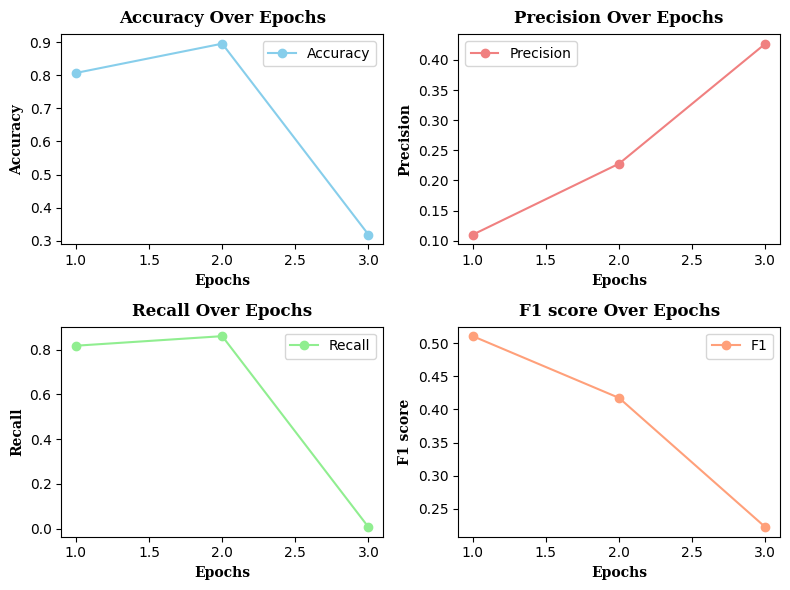

In [ ]:
# Plot accuracy, precision, recall, and F1
plt.figure(figsize=(8, 6))
epochs = range(1, len(accuracy_list) + 1)

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.subplot(2, 2, 1)
plt.plot(epochs, accuracy_list, label="Accuracy", marker='o',color='skyblue')
plt.title("Accuracy Over Epochs",fontdict=font, pad=8)
plt.xlabel("Epochs",fontdict=font2)
plt.ylabel("Accuracy",fontdict=font2)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, precision_list, label="Precision", marker='o',color='lightcoral')
plt.title("Precision Over Epochs",fontdict=font , pad=8)
plt.xlabel("Epochs",fontdict=font2)
plt.ylabel("Precision",fontdict=font2)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, recall_list, label="Recall", marker='o',color='lightgreen')
plt.title("Recall Over Epochs",fontdict=font, pad=8)
plt.xlabel("Epochs",fontdict=font2)
plt.ylabel("Recall",fontdict=font2)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, f1_list, label="F1", marker='o',color='lightsalmon')
plt.title("F1 score Over Epochs",fontdict=font, pad=8)
plt.xlabel("Epochs",fontdict=font2)
plt.ylabel("F1 score",fontdict=font2)
plt.legend()

plt.tight_layout()
plt.show()

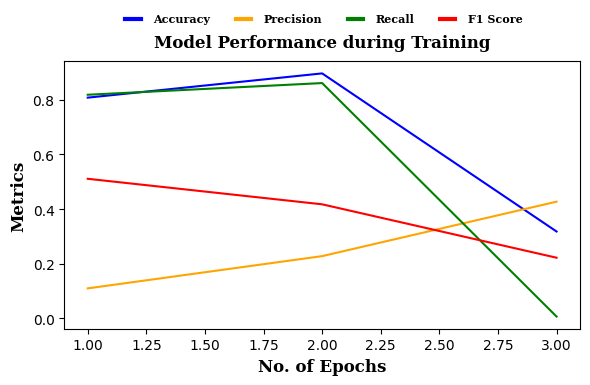

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D
import numpy as np

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

# Simulate data for demonstration purposes
epochs = range(1, len(accuracy_list) + 1)

# Line plot with different colors for each metric
plt.figure(figsize=(6, 4))

# Plot accuracy, precision, recall, and F1 in a single line plot
plt.plot(epochs, accuracy_list, color='blue', label="Accuracy")
plt.plot(epochs, precision_list, color='orange', label="Precision")
plt.plot(epochs, recall_list, color='green', label="Recall")
plt.plot(epochs, f1_list, color='red', label="F1 Score")

# Add a title with specified font properties
plt.title('Model Performance during Training', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12}, pad=10)
# Set x-axis label with specified font properties
plt.xlabel('No. of Epochs', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})

plt.ylabel("Metrics",fontdict=font)


# Define custom legend lines with desired line properties
legend_lines = [
    Line2D([0], [0], color='blue', lw=3),     # Accuracy
    Line2D([0], [0], color='orange', lw=3),   # Precision
    Line2D([0], [0], color='green', lw=3),    # Recall
    Line2D([0], [0], color='red', lw=3)       # F1 Score
]

# Place legend outside the graph by adjusting bbox_to_anchor and specifying it to be outside the axes
plt.legend(legend_lines, ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
           loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=5,
           prop={'family': 'Serif', 'weight': 'bold', 'size': 8}, frameon=False,
           handler_map={Line2D: HandlerLine2D(numpoints=5)})

plt.tight_layout()
plt.show()


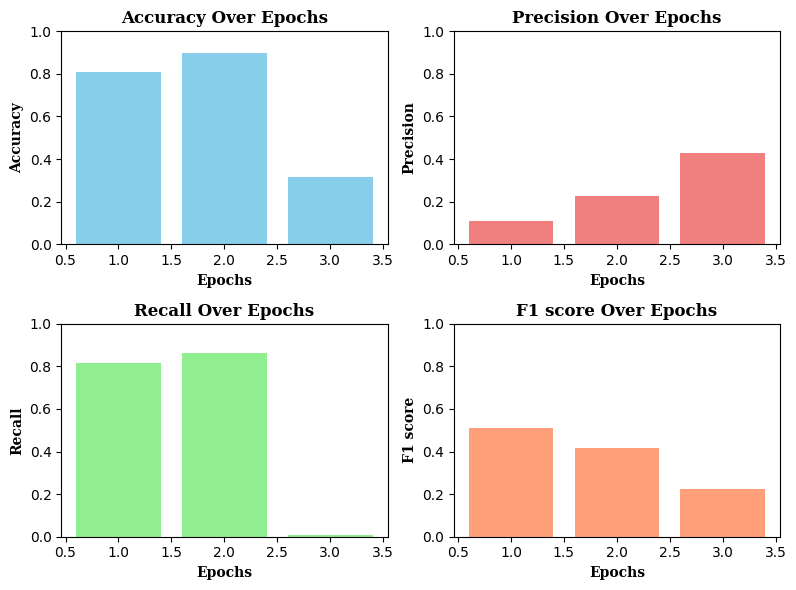

In [ ]:
import numpy as np

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

# Simulate data for demonstration purposes
epochs = range(1, len(accuracy_list) + 1)

# Bar plot with different colors
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.bar(epochs, accuracy_list, color='skyblue')
plt.title("Accuracy Over Epochs",fontdict=font)
plt.xlabel("Epochs",fontdict=font2)
plt.ylabel("Accuracy",fontdict=font2)
plt.ylim(0, 1)  # Assuming accuracy is in the range [0, 1]

plt.subplot(2, 2, 2)
plt.bar(epochs, precision_list, color='lightcoral')
plt.title("Precision Over Epochs",fontdict=font)
plt.xlabel("Epochs",fontdict=font2)
plt.ylabel("Precision",fontdict=font2)
plt.ylim(0, 1)  # Assuming precision is in the range [0, 1]

plt.subplot(2, 2, 3)
plt.bar(epochs, recall_list, color='lightgreen')
plt.title("Recall Over Epochs",fontdict=font)
plt.xlabel("Epochs",fontdict=font2)
plt.ylabel("Recall",fontdict=font2)
plt.ylim(0, 1)  # Assuming recall is in the range [0, 1]

plt.subplot(2, 2, 4)
plt.bar(epochs, f1_list, color='lightsalmon')
plt.title("F1 score Over Epochs",fontdict=font)
plt.xlabel("Epochs",fontdict=font2)
plt.ylabel("F1 score",fontdict=font2)
plt.ylim(0, 1)  # Assuming F1 is in the range [0, 1]

plt.tight_layout()
plt.show()


In [ ]:
# Print confusion matrix for the last epoch
print("Confusion Matrix for the Last Epoch:")
print(confusion_matrices[-1])

Confusion Matrix for the Last Epoch:
[[ 2551    11    27     3     9     2     4     1    10]
 [   22  1088    27     9     0    14     0     0    71]
 [   34    27  1936    13     0     0     4     0    42]
 [    7     6    10  2986     0     0     3    15     7]
 [    7     0     0     0   258     2     1     0    13]
 [    1    24     0     1     2   303    16     7    36]
 [    8     2     6     0     5    20   800     2    57]
 [    0     0     6     5     3     1     5  2739     6]
 [   13    60    39    19     4    30    43     4 49460]]


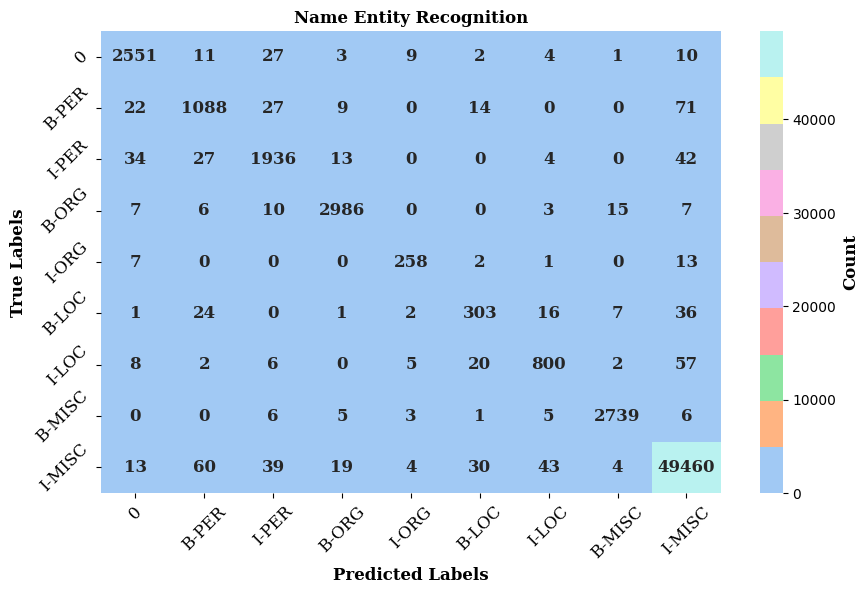

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrices[-1]

# Plot confusion matrix
plt.figure(figsize=(10, 6))

# Define the custom palette
custom_palette = sns.color_palette("pastel")  # Modify the number based on the number of classes in the dataset

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

# Create heatmap with annotations and colormap
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette, linecolor='white',
                      xticklabels=['0', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'],
                      yticklabels=['0', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'],
                      annot_kws={"family": "Serif", 'weight': 'bold', 'size': 12})

# Set x and y labels with the custom font dictionary
heatmap.set_xlabel('Predicted Labels', fontdict=font)
heatmap.set_ylabel('True Labels', fontdict=font)
heatmap.set_title('Name Entity Recognition', fontdict=font)

# Set font properties for tick labels on both axes
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12, rotation=45)  # Added rotation
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12, rotation=45)

# Create a color bar to indicate the scale
cbar = heatmap.collections[0].colorbar
cbar.set_label('Count', fontdict=font)
cbar.ax.tick_params(labelsize=10)

plt.show()


In [ ]:
import json

# Load the existing configuration from the "config.json" file
config = json.load(open("ner_model/config.json"))

# Assuming that "id2label" and "label2id" are dictionaries containing label mappings
id2label = {
    str(i): label for i,label in enumerate(label_list)
}
label2id = {
    label: str(i) for i,label in enumerate(label_list)
}

# Updates the "id2label" and "label2id" fields in the configuration with the provided dictionaries
config["id2label"] = id2label
config["label2id"] = label2id

# Uses json.dump to save the modified configuration back to the "config.json" file, overwriting the previous content.
json.dump(config, open("ner_model/config.json", "w"))


In [ ]:
print(id2label)

{'0': 'O', '1': 'B-PER', '2': 'I-PER', '3': 'B-ORG', '4': 'I-ORG', '5': 'B-LOC', '6': 'I-LOC', '7': 'B-MISC', '8': 'I-MISC'}


In [ ]:
print(label2id)

{'O': '0', 'B-PER': '1', 'I-PER': '2', 'B-ORG': '3', 'I-ORG': '4', 'B-LOC': '5', 'I-LOC': '6', 'B-MISC': '7', 'I-MISC': '8'}


In [ ]:
model_fine_tuned = AutoModelForTokenClassification.from_pretrained("ner_model")
print(model_fine_tuned)

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [ ]:
from transformers import pipeline

# Create an NER pipeline using the fine-tuned model and tokenizer
nlp = pipeline("ner", model=model_fine_tuned, tokenizer=tokenizer)

# Example text
example = "Bill Gates is the Founder of Microsoft"

# Perform Named Entity Recognition (NER) on the example text
ner_results = nlp(example)

# Print the NER results
print(ner_results)


[{'entity': 'B-PER', 'score': 0.99750036, 'index': 1, 'word': 'bill', 'start': 0, 'end': 4}, {'entity': 'I-PER', 'score': 0.9977863, 'index': 2, 'word': 'gates', 'start': 5, 'end': 10}, {'entity': 'B-ORG', 'score': 0.9902952, 'index': 7, 'word': 'microsoft', 'start': 29, 'end': 38}]


In [ ]:
from transformers import pipeline

# Create an NER pipeline using the fine-tuned model and tokenizer
nlp = pipeline("ner", model=model_fine_tuned, tokenizer=tokenizer)

# Example text
example = "My name is Fatema. I live in Dhaka, Bangladesh."

# Perform Named Entity Recognition (NER) on the example text
ner_results = nlp(example)

# Print the NER results
print(ner_results)


[{'entity': 'B-PER', 'score': 0.99352974, 'index': 4, 'word': 'fate', 'start': 11, 'end': 15}, {'entity': 'B-PER', 'score': 0.9942589, 'index': 5, 'word': '##ma', 'start': 15, 'end': 17}, {'entity': 'B-LOC', 'score': 0.99827385, 'index': 10, 'word': 'dhaka', 'start': 29, 'end': 34}, {'entity': 'B-LOC', 'score': 0.9975254, 'index': 12, 'word': 'bangladesh', 'start': 36, 'end': 46}]
